In [15]:
from jax import numpy as jnp
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import numpy as np


In [16]:
data = jnp.array([[0.03,0.19,0.34,0.46,0.78,0.81,1.08,1.18,1.39,1.60,1.65,1.90],
                 [0.67,0.85,1.05,1.00,1.40,1.50,1.30,1.54,1.55,1.68,1.73,1.60]])

In [17]:
def model(phi,x):
    y_pred = phi[0]+phi[1] * x
    return y_pred

In [18]:
def draw_model(data,model,phi,title=None):
    x_model = jnp.arange(0,2,0.01)
    y_model = model(phi,x_model)

    fix, ax = plt.subplots()
    ax.plot(data[0,:],data[1,:],'bo')
    ax.plot(x_model,y_model,'m-')
    ax.set_xlim([0,2]);ax.set_ylim([0,2])
    ax.set_xlabel('x'); ax.set_ylabel('y')
    ax.set_aspect('equal')
    if title is not None:
        ax.set_title(title)
    plt.show()

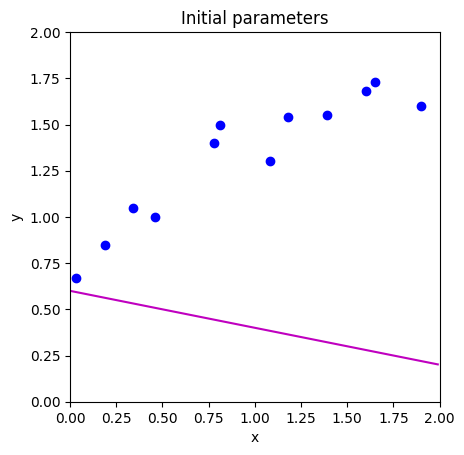

In [19]:
phi = jnp.zeros((2,1))
phi = phi.at[0].set( 0.6 )
phi = phi.at[1].set(-0.2) # Slope
draw_model(data,model,phi, "Initial parameters")

In [20]:

def compute_loss(data_x, data_y, model, phi):
    pred_y = model(phi,data_x)
    loss = jnp.sum((data_y - pred_y)**2)
    return loss

In [21]:
loss = compute_loss(data[0,:],data[1,:],model,jnp.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 12.367))

Your loss = 12.367, Correct loss = 12.367


In [31]:
my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')


In [34]:
import numpy as np
from jax import numpy as jnp
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def draw_loss_function(compute_loss, data, model, phi_iters=None):
    # Define pretty colormap
    my_colormap_vals_dec = jnp.array([int(element, base=16) for element in my_colormap_vals_hex])
    r = jnp.floor(my_colormap_vals_dec / (256 * 256))
    g = jnp.floor((my_colormap_vals_dec - r * 256 * 256) / 256)
    b = jnp.floor(my_colormap_vals_dec - r * 256 * 256 - g * 256)
    a = jnp.ones_like(r)  # Add alpha channel
    my_colormap = ListedColormap(jnp.vstack((r, g, b, a)).transpose() / 255.0)

    # Make grid of intercept/slope values to plot
    intercepts_mesh, slopes_mesh = jnp.meshgrid(jnp.arange(0.0, 2.0, 0.02), jnp.arange(-1.0, 1.0, 0.002))
    loss_mesh = jnp.zeros_like(slopes_mesh)
    # Compute loss for every set of parameters
    for idslope, slope in np.ndenumerate(slopes_mesh):
        loss_mesh = loss_mesh.at[idslope].set(compute_loss(data[0, :], data[1, :], model, jnp.array([[intercepts_mesh[idslope]], [slope]])))

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    ax.contourf(intercepts_mesh, slopes_mesh, loss_mesh, 256, cmap=my_colormap)
    ax.contour(intercepts_mesh, slopes_mesh, loss_mesh, 40, colors=['#80808080'])
    if phi_iters is not None:
        ax.plot(phi_iters[0, :], phi_iters[1, :], 'go-')
    ax.set_ylim([1, -1])
    ax.set_xlabel('Intercept ')
    ax.set_ylabel('Slope, ')
    plt.show()

ValueError: Invalid RGBA argument: Array([0.16470589, 0.03529412, 0.00784314, 0.00392157], dtype=float32)

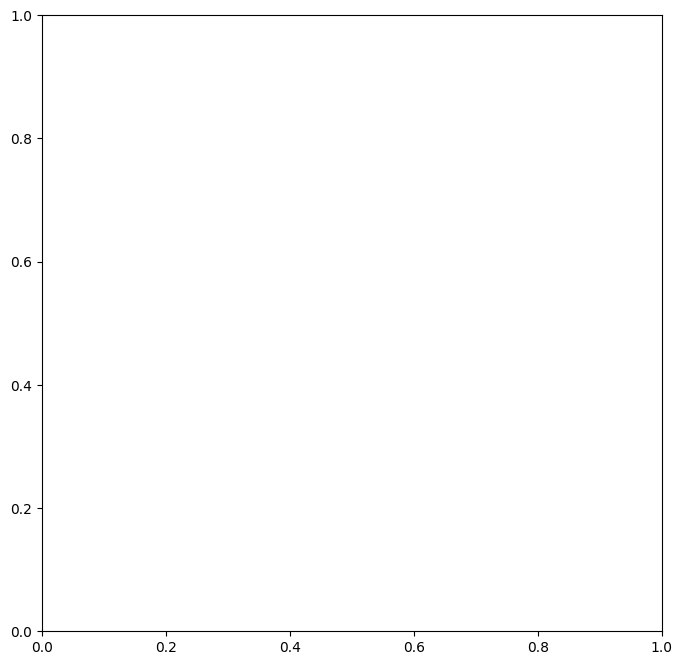

In [35]:
draw_loss_function(compute_loss, data, model)
